In [1]:
import googlemaps
import pandas as pd
import requests
from bs4 import BeautifulSoup
from time import sleep
import numpy as np
import time
import random
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import tkinter as tk
import pickle
import pandas as pd
import numpy as np
import random
import math

In [2]:
df_final3=pd.read_csv("places_lat_long.csv")
df_final3

,Place,Latitud,Longitude
0,"Vienna, Austria",48.208174,16.373819
1,"Salzburg,",47.809490,13.055010
2,"Innsbruck,",47.269212,11.404102
3,"Hallstatt,",47.562234,13.649262
4,"Brussels, Belgium",50.850340,4.351710
...,...,...,...
117,"Warsaw, Poland",52.229676,21.012229
118,"City of San Marino, San Marino",43.935591,12.447281
119,"Madrid, Spain",40.416775,-3.703790
120,"Kiev, Ukraine",50.450100,30.523400


In [3]:
df_final3['Place']=df_final3['Place'].str.strip()  #Se eliminan los espacios en blanco que tienen algunas ciudades

In [4]:
matrx_dist=pd.read_csv("matrx_dist.csv", index_col=0)
matrx_dist

,"Vienna, Austria","Salzburg,","Innsbruck,","Hallstatt,","Brussels, Belgium","Antwerp,","Mostar,","Veliko Tarnovo,","Dubrovnik,","Rovinj,",...,"Chișinău, Moldova","Monaco, Monaco","Podgorica, Montenegro","Skopje, North Macedonia","Oslo, Norway","Warsaw, Poland","City of San Marino, San Marino","Madrid, Spain","Kiev, Ukraine","Vatican City, Vatican City"
"Vienna, Austria",0.000000,3.057778,4.988611,3.393333,11.224444,11.187778,8.673889,12.440278,9.576111,5.925833,...,15.862778,11.735278,11.512222,10.198056,18.804722,7.123333,8.926944,23.226944,14.390278,11.247500
"Salzburg,",3.075278,0.000000,2.128889,1.262500,9.331944,9.408056,8.963889,14.377222,9.865833,4.963611,...,18.618889,9.532500,11.802222,12.135000,18.755278,9.763889,7.334167,20.485556,17.030833,9.655000
"Innsbruck,",5.017778,2.117222,0.000000,3.043056,9.241389,9.363611,10.648889,16.062222,11.550833,6.648611,...,20.561389,7.651944,13.487222,13.820000,19.020833,11.706389,5.845000,18.976389,18.973333,7.956667
"Hallstatt,",3.360000,1.211944,2.977778,0.000000,10.180833,10.256944,8.798056,14.088056,9.700278,5.077500,...,18.700000,10.256667,11.636389,11.845833,19.604167,10.048611,7.448056,21.334444,17.315556,9.768889
"Brussels, Belgium",11.156389,9.248889,9.148611,10.175000,0.000000,0.902500,17.603611,23.277500,18.505833,13.780556,...,24.523333,11.745278,20.442222,21.035278,15.739444,12.578611,12.950833,15.293611,21.417778,15.062222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Warsaw, Poland",7.091667,9.721389,11.652222,10.056667,12.776111,12.379722,15.452778,18.607778,16.355000,12.704722,...,13.403056,18.239444,18.681389,16.365556,16.284444,0.000000,15.705556,27.311111,9.073056,18.026389
"City of San Marino, San Marino",8.957778,7.383611,5.877778,7.557500,12.993611,13.267222,11.099167,16.662500,12.001111,5.927222,...,22.759722,6.460833,13.937500,14.420278,24.636111,15.746667,0.000000,18.512500,22.497222,4.460278
"Madrid, Spain",23.289167,20.481389,18.978333,21.407222,15.311667,15.595833,25.547500,31.520278,26.449722,20.785000,...,37.617222,12.404167,28.385833,29.278056,30.417778,27.133056,18.525556,0.000000,35.972222,19.359444
"Kiev, Ukraine",14.373056,17.002778,18.933611,17.338333,21.563333,21.166944,21.393056,14.673056,22.254167,19.054444,...,6.082778,25.387222,23.096389,20.780833,25.071944,9.037500,22.579167,36.098611,0.000000,24.899722


In [5]:
matrx_dist.columns = matrx_dist.columns.str.strip()   #Elimino los espacios en blanco de las columnas

In [6]:
matrx_dist.index=matrx_dist.index.str.strip()  #Elimino los espacios en blanco de los indices

In [7]:
matrx_dist = matrx_dist.apply(pd.to_numeric)
matrx_dist

,"Vienna, Austria","Salzburg,","Innsbruck,","Hallstatt,","Brussels, Belgium","Antwerp,","Mostar,","Veliko Tarnovo,","Dubrovnik,","Rovinj,",...,"Chișinău, Moldova","Monaco, Monaco","Podgorica, Montenegro","Skopje, North Macedonia","Oslo, Norway","Warsaw, Poland","City of San Marino, San Marino","Madrid, Spain","Kiev, Ukraine","Vatican City, Vatican City"
"Vienna, Austria",0.000000,3.057778,4.988611,3.393333,11.224444,11.187778,8.673889,12.440278,9.576111,5.925833,...,15.862778,11.735278,11.512222,10.198056,18.804722,7.123333,8.926944,23.226944,14.390278,11.247500
"Salzburg,",3.075278,0.000000,2.128889,1.262500,9.331944,9.408056,8.963889,14.377222,9.865833,4.963611,...,18.618889,9.532500,11.802222,12.135000,18.755278,9.763889,7.334167,20.485556,17.030833,9.655000
"Innsbruck,",5.017778,2.117222,0.000000,3.043056,9.241389,9.363611,10.648889,16.062222,11.550833,6.648611,...,20.561389,7.651944,13.487222,13.820000,19.020833,11.706389,5.845000,18.976389,18.973333,7.956667
"Hallstatt,",3.360000,1.211944,2.977778,0.000000,10.180833,10.256944,8.798056,14.088056,9.700278,5.077500,...,18.700000,10.256667,11.636389,11.845833,19.604167,10.048611,7.448056,21.334444,17.315556,9.768889
"Brussels, Belgium",11.156389,9.248889,9.148611,10.175000,0.000000,0.902500,17.603611,23.277500,18.505833,13.780556,...,24.523333,11.745278,20.442222,21.035278,15.739444,12.578611,12.950833,15.293611,21.417778,15.062222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Warsaw, Poland",7.091667,9.721389,11.652222,10.056667,12.776111,12.379722,15.452778,18.607778,16.355000,12.704722,...,13.403056,18.239444,18.681389,16.365556,16.284444,0.000000,15.705556,27.311111,9.073056,18.026389
"City of San Marino, San Marino",8.957778,7.383611,5.877778,7.557500,12.993611,13.267222,11.099167,16.662500,12.001111,5.927222,...,22.759722,6.460833,13.937500,14.420278,24.636111,15.746667,0.000000,18.512500,22.497222,4.460278
"Madrid, Spain",23.289167,20.481389,18.978333,21.407222,15.311667,15.595833,25.547500,31.520278,26.449722,20.785000,...,37.617222,12.404167,28.385833,29.278056,30.417778,27.133056,18.525556,0.000000,35.972222,19.359444
"Kiev, Ukraine",14.373056,17.002778,18.933611,17.338333,21.563333,21.166944,21.393056,14.673056,22.254167,19.054444,...,6.082778,25.387222,23.096389,20.780833,25.071944,9.037500,22.579167,36.098611,0.000000,24.899722


In [8]:
#ELEGIMOS n CIUDADES DE AQUÍ

[i for i in matrx_dist]

['Vienna, Austria',
 'Salzburg,',
 'Innsbruck,',
 'Hallstatt,',
 'Brussels, Belgium',
 'Antwerp,',
 'Mostar,',
 'Veliko Tarnovo,',
 'Dubrovnik,',
 'Rovinj,',
 'Split, Croatia,',
 'Vis Island,',
 'Plitvice Lakes National Park,',
 'Larnaca,',
 'Cesky Krumlov,',
 'Pilsen, Czech Republic,',
 'Prague, Czech Republic',
 'Liberec,',
 'Faroe Islands,',
 'Tallinn, Estonia',
 'Lapland,',
 'Bordeaux,',
 'Paris, France',
 'Carcassonne,',
 'Annecy,',
 'Lille,',
 'Mont Saint-Michel,',
 'Provence,',
 'Colmar,',
 'Kaysersberg,',
 'Tbilisi,',
 'Hamburg,',
 'Berlin, Germany',
 'Munich,',
 'Boppard,',
 'Milos, Greece,',
 'Athens, Greece',
 'Crete,',
 'Santorini,',
 'Causeway Coast, Northern Ireland,',
 'Dublin, Ireland',
 'Sardinia,',
 'Genoa,',
 'Rome, Italy',
 'Florence,',
 'San Marino,',
 'Lucca, Italy,',
 'Bologna,',
 'Padua,',
 'Amalfi Coast,',
 'Lake Como,',
 'Venice,',
 'Sigulda,',
 'Luxembourg, Luxembourg',
 'Den Haag,',
 'Amsterdam, Netherlands',
 'Utrecht,',
 'Monte Carlo,',
 'Zakopane,',
 'Bie

In [9]:
stops=['Oviedo, Spain,',
 'Innsbruck,',
 'Warsaw, Poland',
 'Valletta, Malta',
 'Oslo, Norway']

In [10]:
# NOS QUEDAMOS CON X NUMERO DE CIUDADES EN ESTE DATAFRAME df_final3

df_final3=df_final3[df_final3.Place.isin(stops)]
df_final3.reset_index(inplace=True, drop=True)
df_final3

,Place,Latitud,Longitude
0,"Innsbruck,",47.269212,11.404102
1,"Oviedo, Spain,",43.361914,-5.849389
2,"Valletta, Malta",35.898908,14.514553
3,"Oslo, Norway",59.913869,10.752245
4,"Warsaw, Poland",52.229676,21.012229


In [11]:
# NOS QUEDAMOS CON X NUMERO DE CIUDADES EN ESTE DATAFRAME matrx_dist
matrx_dist=matrx_dist.loc[stops][stops]
matrx_dist

,"Oviedo, Spain,","Innsbruck,","Warsaw, Poland","Valletta, Malta","Oslo, Norway"
"Oviedo, Spain,",0.000000,18.606389,26.465833,32.037222,29.749444
"Innsbruck,",18.494722,0.000000,11.706389,20.424444,19.020833
"Warsaw, Poland",26.639444,11.652222,0.000000,30.494167,16.284444
"Valletta, Malta",31.780833,20.359444,30.432778,0.000000,39.117778
"Oslo, Norway",29.744444,18.936944,16.146667,39.113056,0.000000


In [12]:
df2 = pd.DataFrame(columns=['Place'])     #Creamos otro dataframe con las ciudades elegidas y sus numeros
df2['Number']=list(np.where(matrx_dist.index== stops)[0][0:])
df2['Place']=stops
df2

,Place,Number
0,"Oviedo, Spain,",0
1,"Innsbruck,",1
2,"Warsaw, Poland",2
3,"Valletta, Malta",3
4,"Oslo, Norway",4


In [13]:
df3=pd.merge(left=df_final3, right=df2, on = "Place", how="outer") #Hacemos un merge con el dataframe de las coordenadas para que coincidan los numeros
df3.set_index('Number', inplace = True)   #Asignamos la columna Number como indice y así cada ciudad tiene su numero
df3

,Place,Latitud,Longitude
Number,,,
1,"Innsbruck,",47.269212,11.404102
0,"Oviedo, Spain,",43.361914,-5.849389
3,"Valletta, Malta",35.898908,14.514553
4,"Oslo, Norway",59.913869,10.752245
2,"Warsaw, Poland",52.229676,21.012229


In [14]:
m_hours=matrx_dist.to_numpy()  #Pasamos el df de horas a array

In [15]:
origen= 'Oviedo, Spain,'   #********************************************************************************************Ciudad de origen 
number_origen=np.where(matrx_dist.index== origen)[0][0] #Sacamos el número que corresponde a esa ciudad de origen
number_origen

0

In [16]:
number_stops=5   #HAY QUE CAMBIAR SIEMPRE ESTE NUMERO****************************************************************************
population = []
def selection_population(number_origen,number_stops):
    for i in range(5):                        #Creamos una población de 20 rutas
        pop =list(np.arange(number_stops))    #Creamos una lista con la poblacion dependiendo de cuantas ciudades se quieran visitar
        pop.remove(number_origen)              #Quitamos el número de la ciudad de origen para que luego no se repita cuando la metamos al principio y al final
        pop = np.array(pop)                    #Lo transformamos a array
        np.random.shuffle(pop)                #Barajamos las ciudades para que nos salgan rutas aleatorias
        x = np.hstack(([number_origen], pop, [number_origen])) #Metemos a esa ruta el número de la ciudad de origen al principio y al final
        x = [int(i) for i in x]         #Pasamos esos numeros a enteros para que no nos de error luego
        population.append(x)  
    return population

population=selection_population(number_origen,number_stops)
print(population)

[[0, 2, 3, 1, 4, 0], [0, 3, 2, 1, 4, 0], [0, 2, 4, 1, 3, 0], [0, 1, 2, 3, 4, 0], [0, 2, 1, 3, 4, 0]]


In [17]:
len(population)

5

In [18]:
def fitness_calculation(population,m_hours):  
    fitness = []
    
    for person in population:
        time = 0
        for j in range(len(person) - 1):  
            time += m_hours[person[j], person[j + 1]]  #Se suman los tiempos de un sitio a otro
            
        time += m_hours[person[-1], person[0]]
        
        fitness.append(time)
        
    return (fitness)

fitness=fitness_calculation(population,m_hours)
fitness

[126.08472222222221,
 122.88749999999999,
 113.8925,
 129.66916666666665,
 127.40472222222222]

In [19]:
k=3  #Numero de competidores***********************************************************************************
def parents_selection(fitness,k):

    # Primero se eligen X competidores de esa poblacion de manera aleatoria
    competitors = random.sample(fitness, k)
    
    #El que tenga un fitness más pequeño es el ganador (porque queremos la ruta con menos tiempo)
    winner = min(competitors)
    
    #Se saca el índice para encontrar el padre
    winner_index=np.where(fitness == winner)[0][0]
    father=population[winner_index]      #El padre es el que tenga ese índice
    
    competitors = random.sample(fitness, k)
    winner = min(competitors)
    winner_index=np.where(fitness == winner)[0][0]
    mother=population[winner_index]
    
    return(father, mother)

father, mother=parents_selection(fitness,k)
print(father) 
print(mother)

[0, 2, 4, 1, 3, 0]
[0, 2, 4, 1, 3, 0]


In [20]:
#Asignamos de forma aleatoria k posiciones

k=random.randrange(1, 3, 1)    #CAMBIA CON EL NUMERO DE CIUDADES QUE SE ELIJAN***************************************************
print(len(father)-2)
positions = random.sample(range(len(father)-2), k)

print(positions)

4
[3]


In [21]:
def crossover(father, mother, positions): 
    father, mother = father[1:-1], mother[1:-1]   #Quitamos el primero (origen) y el último(destino final, que es el mismo que el origen)
    
    son = np.full([number_stops-1], np.nan)  #Creamos un hijo con 121 posiciones vacías. Quitamos solo 1 porque al principio hay 122 ciudades y luego 123 contando el origen que se repite
    
    for i in positions:
        son[i] = father[i]   #Metemos las ciudades en el hijo con las mismas posiciones que el padre 
    
    cities = []
    
    for i in mother:   #Recorremos las ciudades de la madre y si no está en las posiciones aleatorias del padre, las metemos en una lista 
        if not i in np.array(father)[positions]:
            cities.append(i)
      
    index_city = 0
    
    for idx, value in enumerate(son):   #Recorremos el índice y las ciudades del hijo. Si la ciudad está vacía (como nan), metemos la ciudad que tenemos en la lista de ciudades sobrantes.
        if np.isnan(value):
            son[idx] = cities[index_city]
            index_city += 1
            
    son = [int(i) for i in son]
    son = [number_origen] + list(son) + [number_origen]
    
    return son

son= crossover(father, mother, positions)
print(son)
len(son)

[0, 2, 4, 1, 3, 0]


6

In [22]:
prob_mut=random.randrange(0, 100, 1)

def mutation(son):
    
    if prob_mut<1:                       #Si la probabilidad es mayor al 90%, se muta
        gen1=np.random.choice(son)       #Sacamos un gen del hijo al azar
        gen2=np.random.choice(son)       #Sacamos otro gen del hijo al azar
        
        while gen1==number_origen:       #Mientras que el gen sea igual al numero de la ciudad de origen, volvemos a sacar un gen porque no podemos mutar esa ciudad
            gen1=np.random.choice(son)
        while gen2==number_origen:
            gen2=np.random.choice(son)
            
        index_gen1=np.where(son==gen1)[0][0]  #Intercambiamos las posiciones de esos genes
        index_gen2=np.where(son==gen2)[0][0]
        son[index_gen1]=gen2
        son[index_gen2]=gen1
        
    else:
        son=son
        
    return son

mutated_son=mutation(son)
print(mutated_son)

[0, 2, 4, 1, 3, 0]


In [23]:
prob_mut

9

In [24]:
def replacement(fitness, population,mutated_son):

    population[np.argmax(fitness)]=mutated_son   #Reemplazamos el que mayor fitness tenga ya que nos interesa el menor tiempo posible
    
    return population

population=replacement(fitness, population,mutated_son)
print(population)

[[0, 2, 3, 1, 4, 0], [0, 3, 2, 1, 4, 0], [0, 2, 4, 1, 3, 0], [0, 2, 4, 1, 3, 0], [0, 2, 1, 3, 4, 0]]


In [25]:
best_route_position=np.argmin(fitness)
best_route=population[best_route_position]
def fitness_cal_person(person):
    hours = 0
    
    for j in range(len(person) - 1): #j recorre el indice de los barrios hasta n-1 
        hours += m_hours[person[j], person[j + 1]]
        
    hours += m_hours[person[-1], person[0]]
    
    return hours

hours=fitness_cal_person(best_route)
hours

113.8925

In [26]:
%%time
k=3 #************************************************************************************************************************hay que cambuar siempre este numero
number_stops=5  #***********************************************************************************************************HAY QUE CAMBIAR SIEMPRE ESTE NUMERO
origen= 'Oviedo, Spain,'   #**************************************************************Ciudad de origen 
number_origen=np.where(matrx_dist.index== origen)[0][0] #Sacamos el número que corresponde a esa ciudad de origen

fitness_totales=[]    #Para graficarlo
total_fitness_individual=[] #Para graficarlo
travels=[]

for i in range(100):
    population=selection_population(number_origen,number_stops)
    fitness=fitness_calculation(population,m_hours)
    fitness_totales.append(fitness)
    father, mother=parents_selection(fitness,k)
    
    k=random.randrange(1, 3, 1)  #**********************************************************************************************HAY QUE CAMBIAR SIEMPRE ESTE NUMERO
    positions = random.sample(range(len(father)-2), k)
    
    son= crossover(father, mother, positions)
    prob_mut=random.randrange(0, 100, 1)
    mutated_son=mutation(son)
    population=replacement(fitness, population,mutated_son)
    fitness=fitness_calculation(population,m_hours)   #Se calcula el fitness otra vez con el hijo dentro
    
    best_route_position=np.argmin(fitness)
    best_route=population[best_route_position]
    travels.append(best_route)
    hours=fitness_cal_person(best_route)
    total_fitness_individual.append(hours)
    
    print(hours)

113.8925
113.8925
113.8925
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.75361111111113
109.

In [27]:
hours

109.75361111111113

In [28]:
roadtrip="-".join([str(_) for _ in best_route])
roadtrip

'0-4-2-1-3-0'

In [68]:
primero=best_route[0]
segundo=best_route[1]
tercero=best_route[2]
cuarto=best_route[3]
quinto=best_route[4]
sexto=best_route[5]

In [69]:
df3["Place"][primero]+'--'+df3["Place"][segundo]+'--'+df3["Place"][tercero]+'--'+df3["Place"][cuarto]+'--'+df3["Place"][quinto]+'--'+df3["Place"][sexto]

'Oviedo, Spain,--Oslo, Norway--Warsaw, Poland--Innsbruck,--Valletta, Malta--Oviedo, Spain,'

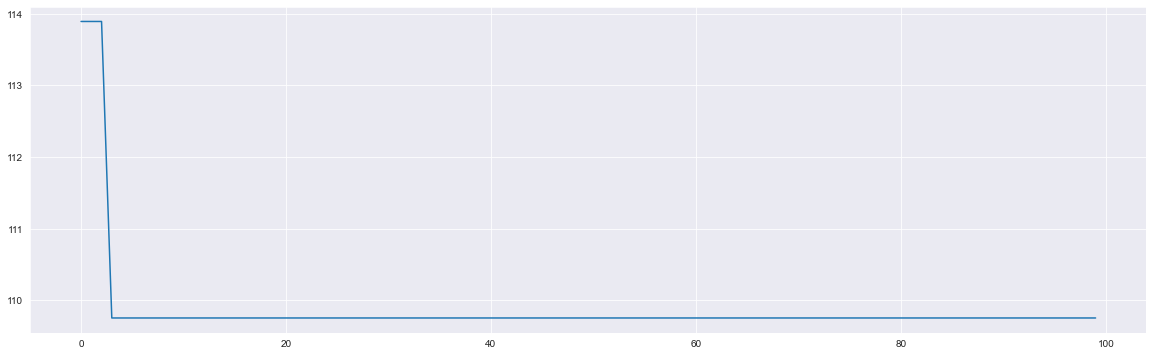

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
plt.plot(total_fitness_individual)
plt.show()

In [30]:
best_trip=travels[-1]
best_trip              #Sacamos el último viaje, que sería el mejor

[0, 4, 2, 1, 3, 0]

In [31]:
sorter = best_trip[1:-1].copy()
sorter    #Nos quedamos con el orden sin la ciudad de origen y destino

[4, 2, 1, 3]

In [46]:
df3

,Place,Latitud,Longitude
Number,,,
1,"Innsbruck,",47.269212,11.404102
0,"Oviedo, Spain,",43.361914,-5.849389
3,"Valletta, Malta",35.898908,14.514553
4,"Oslo, Norway",59.913869,10.752245
2,"Warsaw, Poland",52.229676,21.012229


In [33]:
df_sorter = df3.reset_index()
df_sorter   #Creamos un nuevo dataframe

,Number,Place,Latitud,Longitude
0,1,"Innsbruck,",47.269212,11.404102
1,0,"Oviedo, Spain,",43.361914,-5.849389
2,3,"Valletta, Malta",35.898908,14.514553
3,4,"Oslo, Norway",59.913869,10.752245
4,2,"Warsaw, Poland",52.229676,21.012229


In [34]:
# Convierte la columna Number a categorica
df_sorter.Number = df_sorter.Number.astype("category")   

# 
df_sorter.Number.cat.set_categories(sorter, inplace = True)   #A la columna Number que es categorica le decimos que se ordene de la manera está la mejor ruta 

df_sorter

,Number,Place,Latitud,Longitude
0,1,"Innsbruck,",47.269212,11.404102
1,NaN,"Oviedo, Spain,",43.361914,-5.849389
2,3,"Valletta, Malta",35.898908,14.514553
3,4,"Oslo, Norway",59.913869,10.752245
4,2,"Warsaw, Poland",52.229676,21.012229


In [35]:
ciudad_inicial = df_sorter[df_sorter.Number.isna()]       #La ciudad inicial es la que tiene un NAN en la columna Number
ciudades_ordenadas = df_sorter.sort_values("Number").dropna()   #Le decimos que ordene la columna Number a partir de la best_route,
#                                                                sin contar con la que tienen Nans, por eso se pone .dropna

In [36]:
ciudad_inicial

,Number,Place,Latitud,Longitude
1,NaN,"Oviedo, Spain,",43.361914,-5.849389


In [37]:
df_ready=pd.concat([ciudad_inicial, ciudades_ordenadas, ciudad_inicial], ignore_index = True).iloc[:, 1:]  #Hacemos un concat para meter la ciudad inicial al principio y al final
df_ready                                                                                                   #El iloc es para quitar la columna Number

,Place,Latitud,Longitude
0,"Oviedo, Spain,",43.361914,-5.849389
1,"Oslo, Norway",59.913869,10.752245
2,"Warsaw, Poland",52.229676,21.012229
3,"Innsbruck,",47.269212,11.404102
4,"Valletta, Malta",35.898908,14.514553
5,"Oviedo, Spain,",43.361914,-5.849389


In [38]:
points=df_ready[['Latitud', 'Longitude']].values

In [39]:
europe_map = folium.Map(location = [47.3769, 8.5417], zoom_start = 5)
for lat, lng, label,i in zip(df_ready.Latitud, df_ready.Longitude, df_ready.Place, range(len(df_ready))):
    folium.Marker([lat, lng], 
                  popup = label,
                 icon     = folium.DivIcon(html=f"""<div style=" font-family:fantasy;color: black;font-size:15px; border:2px solid black; width:30px; height:30px;text-aling:center;">{i+1}</div>""")).add_to(europe_map)
    
folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(europe_map)
europe_map